# Raport 8

Kurs DataCamp "Object-Oriented Programming with S3 and R6 in R"

certifikat ([link](https://www.datacamp.com/statement-of-accomplishment/course/1f0fb8983b4f5cd44f53710f87bfe01bb0499b40?raw=1)):

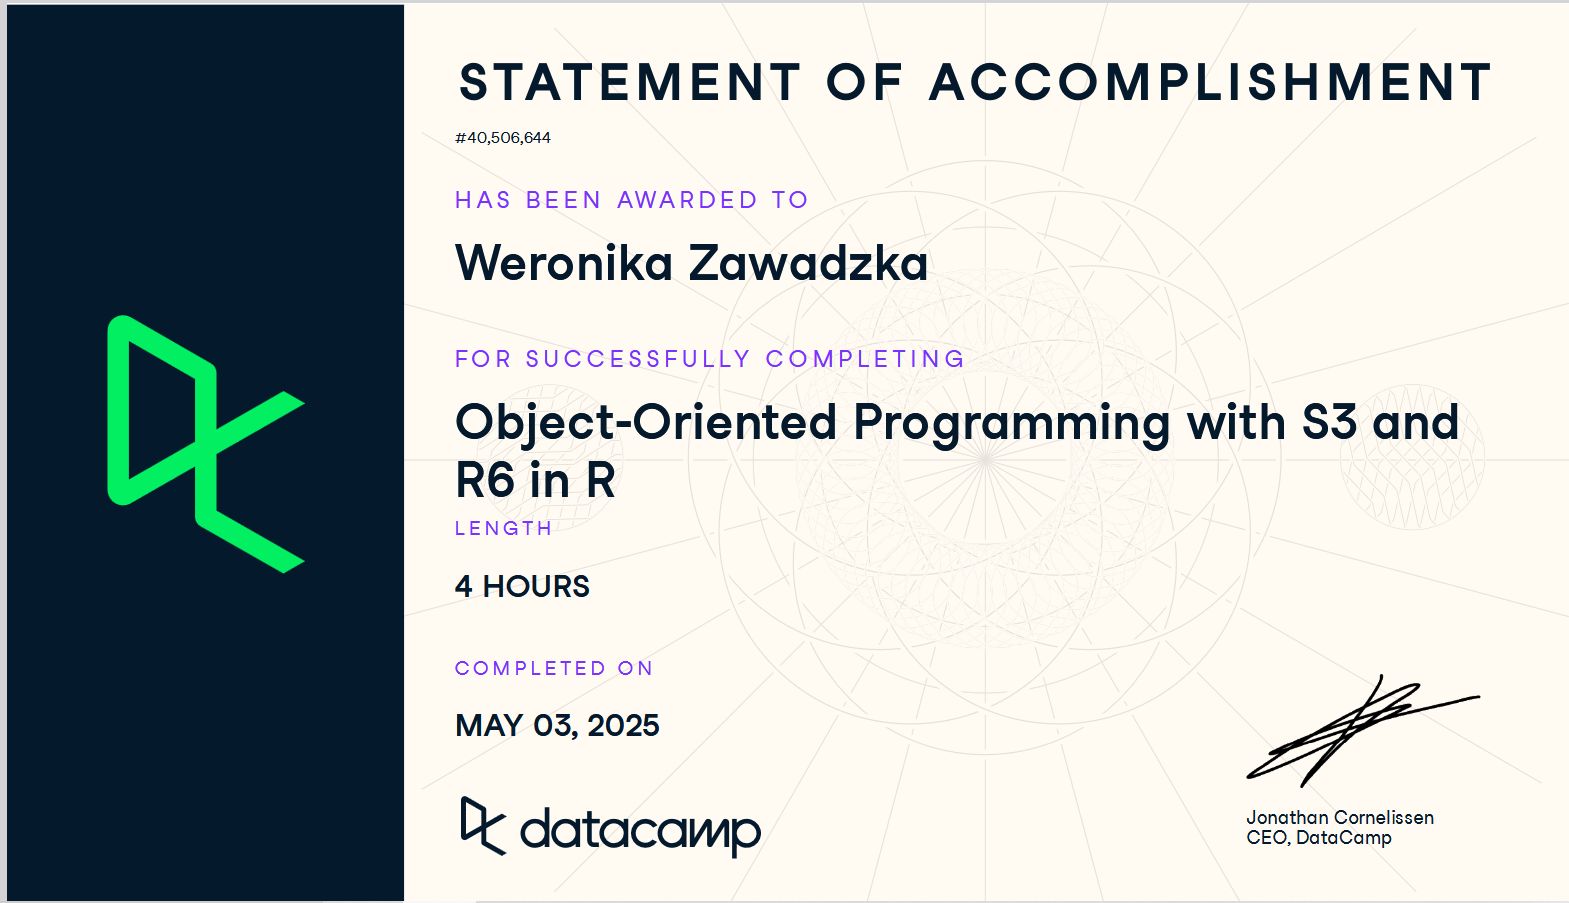

In [ ]:
%load_ext rpy2.ipython

## Podsekcja na kody

### S3
S3 uses a strict naming convention: all S3 methods have a name of the form generic.class.

In [ ]:
%%R
install.packages('pryr')
install.packages('assertive')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/pryr_0.1.6.tar.gz'
Content type 'application/x-gzip' length 42090 bytes (41 KB)
downloaded 41 KB


The downloaded source packages are in
	‘/tmp/Rtmp1fMAwX/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
In addition: Warning message:
package ‘assertive’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages 


In [ ]:
%%R
library(pryr)
print(is_s3_generic("t"))          # generic transpose function
print(is_s3_method("t.data.frame")) # transpose method for data.frames
print(is_s3_method("t.test"))       # a function for Student's t-tests

[1] TRUE
[1] TRUE
[1] FALSE


If no suitable method is found for a generic, then an error is thrown. Rather than having to write dozens of methods for every kind of input, you can create a method that handles all types that don't have a specific method. This is called the default method; it always has the name generic.default. For example, print.default() (docs will print any type of object that doesn't have its own print() (docs) method.

In [ ]:
%%R
get_n_elements.default <- function(x, ...) {length(unlist(x))}

In [ ]:
%%R
methods(class = "glm")

 [1] add1           anova          coerce         confint        cooks.distance
 [6] deviance       drop1          effects        extractAIC     family        
[11] formula        influence      initialize     logLik         model.frame   
[16] nobs           predict        print          profile        residuals     
[21] rstandard      rstudent       show           sigma          slotsFromS3   
[26] summary        vcov           weights       
see '?methods' for accessing help and source code


### R6 classes

In [ ]:
%%R
library(R6)
# Define microwave_oven_factory
microwave_oven_factory <- R6Class(
  "MicrowaveOven",
  private = list(
    power_rating_watts = 800
  )
)

# Make a new microwave oven
microwave_oven <- microwave_oven_factory$new()

Encapsulation

In [ ]:
%%R
microwave_oven_factory <- R6Class(
  "MicrowaveOven",
  private = list(
    power_rating_watts = 800,
    door_is_open = FALSE
  ),
  public = list(
    cook = function(time_seconds) {
      Sys.sleep(time_seconds)
      print("Your food is cooked!")
    },
    open_door = function() {
      private$door_is_open <- TRUE
    },
    close_door = function() {
      private$door_is_open <- FALSE
    },
    # construtor method
    initialize = function(power_rating_watts, door_is_open) {
      if(!missing(power_rating_watts)) {
        private$power_rating_watts <- power_rating_watts
      }
      if(!missing(door_is_open)) {
        private$door_is_open <- door_is_open
      }
    }
  )
)

# Make a microwave
a_microwave_oven <- microwave_oven_factory$new(650, TRUE)

# Call cook method for 1 second
a_microwave_oven$cook(1)

[1] "Your food is cooked!"


Getters & setters = "active" element of a class

In [ ]:
%%R
# Add a binding for power rating
microwave_oven_factory <- R6Class(
  "MicrowaveOven",
  private = list(
    ..power_rating_watts = 800
  ),
  public = list(
    cook = function(time_seconds) {
      Sys.sleep(time_seconds)
      print("Your food is cooked!")
    }
  ),
  active = list(
    # READ ONLY
    power_rating_watts = function() {
      private$..power_rating_watts
    }


  )
)

# Make a microwave
a_microwave_oven <- microwave_oven_factory$new()

# Get the power rating
a_microwave_oven$power_rating_watts

[1] 800


In [ ]:
%%R
#("no assertive package for this version of R...")
# library(assertive)
# Add a binding for power rating
# microwave_oven_factory <- R6Class(
#   "MicrowaveOven",
#   private = list(
#     ..power_rating_watts = 800,
#     ..power_level_watts = 800
#   ),
#   # Add active list containing an active binding
#   active = list(
#     power_level_watts = function(value) {
#       if(missing(value)) {
#         # Return the private value
#         private$..power_rating_watts
#       } else {
#         # Assert that value is a number
#         assert_is_a_number(value)
#         # Assert that value is in a closed range from 0 to power rating
#         assert_all_are_in_closed_range(value, 0, private$..power_rating_watts)
#         # Set the private power level to value
#         private$..power_rating_watts <- value
#       }
#     }
#   )
# )

# # Make a microwave
# a_microwave_oven <- microwave_oven_factory$new()

# # Get the power level
# a_microwave_oven$power_level_watts

# # Try to set the power level to "400"
# a_microwave_oven$power_level_watts <- "400"

# # Try to set the power level to 1600 watts
# a_microwave_oven$power_level_watts <- 1600

# # Set the power level to 400 watts
# a_microwave_oven$power_level_watts <- 400

NULL


Inheritance

In [ ]:
%%R
# Explore the microwave oven class
microwave_oven_factory

# Define a fancy microwave class inheriting from microwave oven
fancy_microwave_oven_factory <- R6Class(
    "FancyMicrowaveOven",
    inherit = microwave_oven_factory
)

Embrace, Extend, Override

In [ ]:
%%R
# Extend the class definition
fancy_microwave_oven_factory <- R6Class(
  "FancyMicrowaveOven",
  inherit = microwave_oven_factory,
  # Add a public list with a cook baked potato method
  public = list(
    cook_baked_potato = function() {
      self$cook(3)
    }


  )
)

# Instantiate a fancy microwave
a_fancy_microwave <- fancy_microwave_oven_factory$new()

# Call the cook_baked_potato() method
a_fancy_microwave$cook_baked_potato()

[1] "Your food is cooked!"


In [ ]:
%%R
# Explore microwave oven class
microwave_oven_factory

# Update the class definition
fancy_microwave_oven_factory <- R6Class(
  "FancyMicrowaveOven",
  inherit = microwave_oven_factory,
  # Add a public list with a cook method
  public = list(
    cook = function(time_seconds) {
      super$cook(time_seconds)
      message("Enjoy your dinner!")
    }



  )
)

# Instantiate a fancy microwave
a_fancy_microwave <- fancy_microwave_oven_factory$new()

# Call the cook() method
a_fancy_microwave$cook(1)

[1] "Your food is cooked!"


Enjoy your dinner!


### Environments

copy by reference

In [ ]:
%%R
# Complete the class definition
microwave_oven_factory <- R6Class(
  "MicrowaveOven",
  private = list(
    shared = {
      # Create a new environment named e
      e <- new.env()
      # Assign safety_warning into e
      e$safety_warning <- "Warning. Do not try to cook metal objects."
      # Return e
      e
    }
  ),
  active = list(
    # Add the safety_warning binding
    safety_warning = function(value) {
      if(missing(value)) {
        private$shared$safety_warning
      } else {
        private$shared$safety_warning <- value
      }
    }
  )
)

# Create two microwave ovens
a_microwave_oven <- microwave_oven_factory$new()
another_microwave_oven <- microwave_oven_factory$new()

# Change the safety warning for a_microwave_oven
a_microwave_oven$safety_warning <- "Warning. If the food is too hot you may scald yourself."

# Verify that the warning has change for another_microwave
another_microwave_oven$safety_warning

[1] "Warning. If the food is too hot you may scald yourself."


## Refleksje

Zawsze kojarzyłam programowanie obiektowe raczej z językami niższego poziomu, a nie z R. W R korzystałam czasem z gotowych klas i konstruktorów przy pracy z danymi genomicznymi, które wymagały użycia specyficznych struktur, ale się nidgy bardziej nie zgłębiłam w ten temat. Cieszę się, że zrobiłam ten kurs, na pewno zmieni to sposób w jaki myślę o tworzeniu kodu w R. Inne wnioski: nie używać nazw zmiennych typu dataset.one etc. (z kropkami), żeby nie mieszać z metodami S3 - a często tak robiłam. Używać camel case lub z nazw z podłogami. Ogółem, nauczyłam się nowych rzeczy, które przydadzą mi się na codzień.